# Question 41 - 60

In [1]:
import pandas as pd
import re
from datetime import datetime, date
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 41. Find the visit type with maximum 'No Show'

In [2]:
AmbulatoryVisits = pd.read_excel("HospitalDatabase.xlsx",sheet_name= "AmbulatoryVisits")
AmbulatoryVisits.head()
max_count = AmbulatoryVisits[AmbulatoryVisits["VisitStatus"]=="No Show"]
max_count["VisitType"].value_counts()[:1]
# AmbulatoryVisits[AmbulatoryVisits["VisitStatus"]=="No Show"]["VisitType"].value_counts()[:1]

Telemedicine    74
Name: VisitType, dtype: int64

### 42.Using loc , get the details of the providers where providerId is between 11 and 20 and ProviderSpecialty is Surgery

In [3]:
Providers = pd.read_excel("HospitalDatabase.xlsx",sheet_name= "Providers")
Providers_fil = Providers[Providers["ProviderSpecialty"]=="Surgery"]
Providers_fil.head()
Providers_fil.loc[10:19]

,ProviderID,ProviderName,ProviderSpecialty,ProviderDateOnStaff
10,11,Kim Kimberly,Surgery,1998-05-10 14:47:29.468
11,12,Sarah Ab,Surgery,1998-08-18 05:22:40.762
12,13,Abigail Marriot,Surgery,1998-11-08 12:25:45.705
13,14,Dave Yu,Surgery,1999-06-26 16:18:57.436
14,15,Christian Saint,Surgery,2000-08-27 00:12:40.326
15,16,Perry Pardon,Surgery,2001-02-13 11:49:17.862


### 43. Write a regular expression to find all the digits and numbers in the string

In [4]:
str = 'We live at 9-162 magnolia. My phone number is 666688888.'
x = re.findall('[0-9]+', str)
print(x)

['9', '162', '666688888']


### 21. Which demographic patients are prone to get stroke

In [5]:
Patients = pd.read_excel("HospitalDatabase.xlsx",sheet_name= "Patients") 
now = datetime.now()
Patients["Age"] =(now - Patients['DateOfBirth'])/np.timedelta64(1,'Y')
Patients.head()
ReAdmissionRegistry = pd.read_excel("HospitalDatabase.xlsx",sheet_name= "ReAdmissionRegistry")
df = pd.merge(Patients, ReAdmissionRegistry,how='inner',on=["PatientID"])
a = df[df["PrimaryDiagnosis"] == "Stroke"]
a["Race"].value_counts()

Black/African-American    40
White                     28
Name: Race, dtype: int64

### 44. Create a pivot table displaying average LOS based on Service and Primary Diagnosis

In [6]:
ReAdmissionRegistry = pd.read_excel("HospitalDatabase.xlsx",sheet_name= "ReAdmissionRegistry")
ReAdmissionRegistry["LOS"]= ReAdmissionRegistry["DischargeDate"] - ReAdmissionRegistry["AdmissionDate"]
ReAdmissionRegistry.pivot_table(index=["Service"], columns=["PrimaryDiagnosis"], values=["LOS"],aggfunc="mean")

LOS                          \
PrimaryDiagnosis                     AMI                    Afib   
Service                                                            
Cardiology       10 days 17:50:17.068400 11 days 16:43:04.519200   
General Medicine                     NaT                     NaT   
Hospitalist      10 days 00:30:31.743000                     NaT   
ICU              12 days 14:59:32.471600  6 days 22:18:35.647000   
Neurology         9 days 07:53:41.872500                     NaT   
Orthopeadics                         NaT                     NaT   

                                                                        \
PrimaryDiagnosis                 Broken Leg                   Diabetes   
Service                                                                  
Cardiology       10 days 22:44:11.476333333                        NaT   
General Medicine 13 days 06:02:10.045666666 10 days 20:03:59.416736842   
Hospitalist       8 days 06:38:49.924666666  9 days 07:46:16.835153846   
ICU                                     NaT                        NaT   
Neurology                               NaT                        NaT   
Orthopeadics                            NaT                        NaT   

                                                                        \
PrimaryDiagnosis                      Fever                        Flu   
Service                                                                  
Cardiology                              NaT    12 days 10:08:21.363000   
General Medicine  8 days 11:16:36.716307692 10 days 10:02:10.029796296   
Hospitalist      10 days 21:50:58.966666666  9 days 05:05:03.015473684   
ICU                 13 days 22:11:21.610000  8 days 09:49:41.249333333   
Neurology                               NaT     7 days 19:17:45.169000   
Orthopeadics                            NaT                        NaT   

                                                                       \
PrimaryDiagnosis              Heart Failure              Hip Fracture   
Service                                                                 
Cardiology        9 days 22:33:05.353871794                       NaT   
General Medicine                        NaT                       NaT   
Hospitalist                             NaT                       NaT   
ICU               9 days 22:36:01.571181818                       NaT   
Neurology        13 days 14:46:28.502166666                       NaT   
Orthopeadics                            NaT 9 days 17:32:33.319695652   

                                                                        \
PrimaryDiagnosis               Hypertension             Kidney Failure   
Service                                                                  
Cardiology                              NaT     4 days 16:16:06.782000   
General Medicine  9 days 11:41:31.025285714    11 days 04:34:51.031000   
Hospitalist      11 days 07:55:37.157333333 10 days 14:39:50.273666666   
ICU                  8 days 20:04:45.589750    11 days 13:33:12.198000   
Neurology            9 days 18:36:03.262200                        NaT   
Orthopeadics                            NaT                        NaT   

                                                                      \
PrimaryDiagnosis          Knee Replacement                Laceration   
Service                                                                
Cardiology                             NaT                       NaT   
General Medicine                       NaT 9 days 22:50:48.247238095   
Hospitalist         6 days 16:40:18.171000 9 days 13:37:12.731714285   
ICU                                    NaT   15 days 06:58:47.690000   
Neurology                              NaT                       NaT   
Orthopeadics     9 days 21:53:09.485727272                       NaT   

                                                                    \
PrimaryDiagnosis                  Migraine    

### 45. Calculate mortality by diagnosis

In [7]:
ReAdmissionRegistry = pd.read_excel("HospitalDatabase.xlsx",sheet_name= "ReAdmissionRegistry")
Mortality_Diag = ReAdmissionRegistry[ReAdmissionRegistry["DischargeDisposition"]=="Expired"]
Mortality_Diag.groupby(["DischargeDisposition","PrimaryDiagnosis"])["PatientID"].count()

DischargeDisposition  PrimaryDiagnosis  
Expired               AMI                    6
                      Afib                   4
                      Broken Leg             3
                      Diabetes               9
                      Fever                  4
                      Flu                   11
                      Heart Failure         16
                      Hip Fracture           3
                      Hypertension          16
                      Kidney Failure         2
                      Knee Replacement       2
                      Laceration             2
                      Pain                   1
                      Pneumonia             16
                      Spinal Cord Injury     2
                      Stroke                 7
Name: PatientID, dtype: int64

### 46. Write a code to split a sentence into words using regex

In [65]:
text = """
She _ s so * nice!
split a sentence into words
"""
# matches = re.findall(r'[A-Za-z]+|[^A-Za-z ]', text)
matches = re.findall(r'[A-Za-z]+|[^A-Za-z \n ]', text)
print(matches)

['She', '_', 's', 'so', '*', 'nice', '!', 'split', 'a', 'sentence', 'into', 'words']


### 11. Create a pie chart by taking Service= ["Icu", "Neurology", "General", "Medicine"] & EcpectedLOS=[10,5,7,9] &explode the wedge with highest LOS

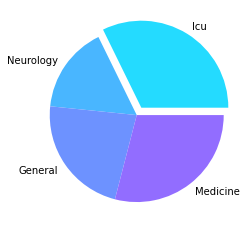

In [47]:
Service= ["Icu", "Neurology", "General", "Medicine"]
ExpectedLOS=[10,5,7,9]
explode = [0.1, 0, 0, 0]
palette_color = sns.color_palette('cool')
plt.pie(ExpectedLOS, labels=Service, colors=palette_color, explode=explode)
plt.show()

### 47. Using indexing ,loc ,retrieve the row with maximum BloodPressureSystolic

#### Index

In [10]:
AmbulatoryVisits = pd.read_excel("HospitalDatabase.xlsx",sheet_name= "AmbulatoryVisits")
max_value = AmbulatoryVisits["BloodPressureSystolic"].max()
AmbulatoryVisits[AmbulatoryVisits["BloodPressureSystolic"]== max_value]

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
236,933,884,27,2019-02-14,2019-01-22 19:26:49.163,12,Telemedicine,190.0,143.989174,74.976879,Completed
251,888,906,24,2019-03-31,2019-03-17 23:21:17.361,10,New,190.0,137.207999,52.666922,Completed
424,314,63,7,2019-04-05,2019-03-24 22:31:26.092,11,Telemedicine,190.0,121.539859,95.471260,Completed
432,740,892,31,2019-03-14,2019-03-11 15:08:33.963,8,Physical,190.0,145.343479,94.849021,Completed
677,929,880,23,2019-02-10,2019-01-22 13:32:14.549,8,Follow Up,190.0,144.313400,82.781940,Completed
869,839,857,12,2019-03-17,2019-02-23 09:05:43.676,8,Follow Up,190.0,130.997386,71.829542,Completed
934,482,866,14,2019-05-04,2019-04-13 07:54:49.580,5,New,190.0,124.736359,69.731779,Canceled


#### Loc

In [11]:
max_value = AmbulatoryVisits["BloodPressureSystolic"].max()
AmbulatoryVisits.loc[AmbulatoryVisits["BloodPressureSystolic"] == max_value]

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
236,933,884,27,2019-02-14,2019-01-22 19:26:49.163,12,Telemedicine,190.0,143.989174,74.976879,Completed
251,888,906,24,2019-03-31,2019-03-17 23:21:17.361,10,New,190.0,137.207999,52.666922,Completed
424,314,63,7,2019-04-05,2019-03-24 22:31:26.092,11,Telemedicine,190.0,121.539859,95.471260,Completed
432,740,892,31,2019-03-14,2019-03-11 15:08:33.963,8,Physical,190.0,145.343479,94.849021,Completed
677,929,880,23,2019-02-10,2019-01-22 13:32:14.549,8,Follow Up,190.0,144.313400,82.781940,Completed
869,839,857,12,2019-03-17,2019-02-23 09:05:43.676,8,Follow Up,190.0,130.997386,71.829542,Completed
934,482,866,14,2019-05-04,2019-04-13 07:54:49.580,5,New,190.0,124.736359,69.731779,Canceled


### 48. Display the average LOS based on Service and Discharge Disposition(Maintain the column Hierarchy)

In [12]:
ReAdmissionRegistry = pd.read_excel("HospitalDatabase.xlsx",sheet_name= "ReAdmissionRegistry")
ReAdmissionRegistry["LOS"]= ReAdmissionRegistry["DischargeDate"] - ReAdmissionRegistry["AdmissionDate"]
ReAdmissionRegistry.head()
ReAdmissionRegistry.groupby(["DischargeDisposition","Service"])["LOS"].mean()

DischargeDisposition  Service         
Expired               Cardiology          9 days 08:35:16.352066666
                      General Medicine    8 days 23:20:11.814888888
                      Hospitalist           10 days 14:06:42.815200
                      ICU                 9 days 18:58:35.305965517
                      Neurology          10 days 15:37:05.725148148
                      Orthopeadics          12 days 07:51:48.451200
Home                  Cardiology            10 days 15:12:46.317720
                      General Medicine   10 days 07:09:33.605737991
                      Hospitalist         9 days 12:31:51.489784090
                      ICU                 9 days 13:48:53.376454545
                      Neurology           9 days 16:15:31.363138888
                      Orthopeadics        9 days 07:48:01.454282051
Transfer              Cardiology            11 days 18:14:12.311200
                      General Medicine   11 days 01:49:20.759312500
         

### 49. Create a jointplot between expected mortality & expected length of stay

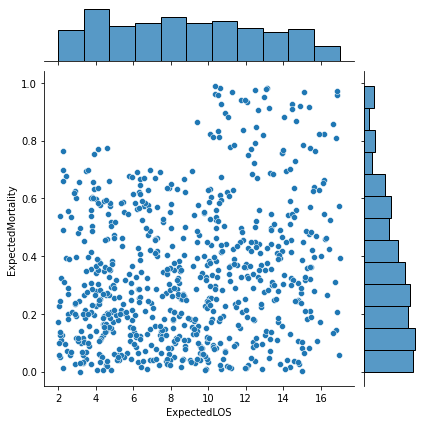

In [13]:
ReAdmissionRegistry = pd.read_excel("HospitalDatabase.xlsx",sheet_name= "ReAdmissionRegistry")
sns.jointplot(x = "ExpectedLOS", y = "ExpectedMortality", kind = "scatter", data = ReAdmissionRegistry)
plt.show()

### 50. Which departmentID has maximum number of visits scheduled.

In [14]:
max_visit_schedule = pd.read_excel("HospitalDatabase.xlsx",sheet_name= "AmbulatoryVisits")
max_visit_schedule.head()
max_visit_schedule["VisitDepartmentID"].value_counts()[:1]

11    102
Name: VisitDepartmentID, dtype: int64

### 51. Display patient details where "ReasonForVisit" is either 'Migraine' or 'Pneumonia' and Acuity is 2 or more.

In [15]:
EDUnique = pd.read_excel("HospitalDatabase.xlsx",sheet_name= "EDUnique")
EDUnique.head()
EDUnique[(EDUnique["ReasonForVisit"].isin(["Migraine","Pneumonia"])) & (EDUnique["Acuity"] >= 2)]

,EDVisitID,PatientID,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition
1,12,12,2020-01-01 02:45:40.302,2020-01-02 02:00:00.517,2,Migraine,Admitted
3,14,14,2020-01-01 03:12:19.349,2020-01-01 04:32:29.142,3,Migraine,Admitted
11,29,29,2020-01-01 06:51:28.639,2020-01-02 05:57:01.639,2,Pneumonia,Admitted
12,30,30,2020-01-01 07:25:54.177,2020-01-01 23:30:20.151,3,Pneumonia,Admitted
13,31,31,2020-01-01 07:32:51.917,2020-01-01 19:55:46.991,4,Pneumonia,Admitted
...,...,...,...,...,...,...,...
853,1027,773,2020-01-13 15:27:07.001,2020-01-14 13:27:31.778,2,Migraine,Discharged
896,1104,850,2020-01-14 10:46:08.650,2020-01-14 20:52:26.031,2,Migraine,Discharged
898,1106,852,2020-01-14 11:19:41.401,2020-01-15 02:47:17.353,2,Migraine,Discharged
906,1122,868,2020-01-14 15:05:58.777,2020-01-15 13:53:02.550,2,Migraine,Discharged


### 52. Retrieve the row with minimum DBP using sorting technique

In [16]:
AmbulatoryVisits = pd.read_excel("HospitalDatabase.xlsx",sheet_name= "AmbulatoryVisits")
df_sort = AmbulatoryVisits.sort_values(by=["BloodPressureDiastolic"])
df_sort.head(1)

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
757,163,801,11,2019-02-08,2019-02-07 23:41:12.181,7,Follow Up,120.0,51.695653,53.310495,Completed


### 53. Take the ReasonForVisit from user, find the number of patients admitted with that ReasonForVisit

In [17]:
def reasoncount(reason):
    EDUnique = pd.read_excel("HospitalDatabase.xlsx",sheet_name= "EDUnique")
    displaycount = EDUnique[EDUnique["ReasonForVisit"]== reason]["ReasonForVisit"].count()
    print(displaycount)
    
    
    
def  EnterReason():
    reason = input("Enter Reason for visit :")
    reasoncount(reason)
    
EnterReason() 



Enter Reason for visit :Chest Pain
91


### 54. Mortality O.E

In [18]:
ReAdmissionRegistry = pd.read_excel("HospitalDatabase.xlsx",sheet_name= "ReAdmissionRegistry")
sum_of_mortality = (ReAdmissionRegistry[ReAdmissionRegistry["DischargeDisposition"]=="Expired"]["DischargeDisposition"].count())
sum_of_mortality / (ReAdmissionRegistry["ExpectedMortality"].sum())

0.4272709474250124

### 55. Create a bar chart on service & expected length of stay

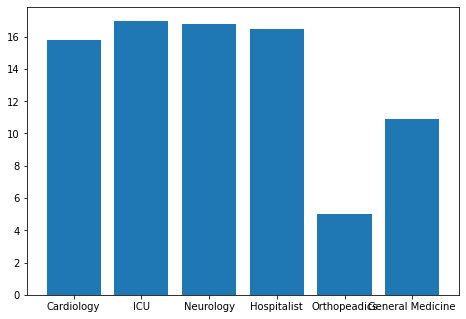

In [75]:
Discharges = pd.read_excel("HospitalDatabase.xlsx",sheet_name= "Discharges")
# print(Discharges.head())
# sns.barplot(y = "Service", x = "ExpectedLOS",data = Discharges)
# plt.show()

# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# langs = Discharges["Service"]
# students = Discharges["ExpectedLOS"]
# ax.bar(langs,students)
# plt.show()

# exp_mor = df['Discharges'].groupby(['Service']).agg({'ExpectedMortality': 'count'}).sort_values('ExpectedMortality', ascending = True)
# exp_mor.plot.bar(color = 'orange', edgecolor = 'black')
# plt.title('Bar Plot of Service and Count of Expected Mortality')
# plt.xlabel('Service')
# plt.ylabel('count of expected mortality')
# plt.show()

exp_mor = Discharges.groupby(['Service']).agg({'ExpectedLOS': 'count'})
exp_mor.plot.bar(color = 'orange', edgecolor = 'black')
plt.title('Bar chart on service & expected length of stay')
plt.xlabel('Service')
plt.ylabel('Count of ExpectedLOS')
plt.show()

### 56. Count of canceled status

In [20]:
AmbulatoryVisits = pd.read_excel("HospitalDatabase.xlsx",sheet_name= "AmbulatoryVisits")
AmbulatoryVisits.groupby(["VisitStatus"])["VisitID"].count()[:1]

VisitStatus
Canceled    60
Name: VisitID, dtype: int64

### 57. Find the age prone to get stroke

In [58]:
Patients = pd.read_excel("HospitalDatabase.xlsx",sheet_name= "Patients") 
now = datetime.now()
Patients["Age"] =(now - Patients['DateOfBirth'])/np.timedelta64(1,'Y')
Patients.head()
ReAdmissionRegistry = pd.read_excel("HospitalDatabase.xlsx",sheet_name= "ReAdmissionRegistry")
df = pd.merge(Patients, ReAdmissionRegistry,how='inner',on=["PatientID"])
a = df[df["PrimaryDiagnosis"] == "Stroke"]
min_val = a["Age"].min()
max_val = a["Age"].max()
print("Age prone to get stroke between {0} and {1}".format(min_val,max_val))

Age prone to get stroke between 35.484025697959424 and 62.129419981887736


### 58. Display total count of patients service wise based on gender


In [22]:
Patients = pd.read_excel("HospitalDatabase.xlsx",sheet_name= "Patients") 
Discharges = pd.read_excel("HospitalDatabase.xlsx",sheet_name= "Discharges")
df = pd.merge(Patients, Discharges,how='inner',on=["PatientID"])
df.groupby(["Service","Gender"])["PatientID"].count()

Service           Gender
Cardiology        Female     41
                  Male       54
General Medicine  Female    114
                  Male      149
Hospitalist       Female     35
                  Male       66
ICU               Female     65
                  Male       86
Neurology         Female     34
                  Male       31
Orthopeadics      Female     22
                  Male       23
Name: PatientID, dtype: int64

### 59. Create a dataframe by splitting provider name to firstname and lastname with names for the columns

In [23]:
df = pd.read_excel("/Users/salinipalanisamy/Downloads/HospitalDatabase.xlsx",sheet_name="Providers")

df[['Firstname','Lastname']] = df["ProviderName"].str.split(expand=True)
df.head()

,ProviderID,ProviderName,ProviderSpecialty,ProviderDateOnStaff,Firstname,Lastname
0,1,Sally Sue,Pediatrics,1993-01-01 00:00:00.000,Sally,Sue
1,2,Mike Myers,Pediatrics,1993-05-02 00:00:17.695,Mike,Myers
2,3,Jordan Michael,Pediatrics,1993-06-24 21:31:46.687,Jordan,Michael
3,4,Ted Texas,Pediatrics,1993-12-23 21:33:52.299,Ted,Texas
4,5,Ala Bama,Pediatrics,1995-01-10 02:53:47.838,Ala,Bama


### 60. Predict the output of the program..

In [60]:
class Acc: 
    def __init__(self, id): 
        self.id = id
        id = 555 
       
    
acc = Acc(111) 
print(acc.id)



111
